### 8 Ejercicios y Problemas. 

1. Suponga que usted es el jefe de gobierno y está interesado en que pasen los proyectos de su
programa político. Sin embargo, en el congreso conformado por 5 partidos, no es fácil su tránsito,
por lo que debe repartir el poder, conformado por ministerios y otras agencias del gobierno, con
base en la representación de cada partido. Cada entidad estatal tiene un peso de poder, que es el
que se debe distribuir. Suponga que hay 50 curules, distribuya aleatoriamente, con una distribución
no informe entre los 5 partidos esas curules. Defina una lista de 50 entidades y asígneles
aleatoriamente un peso político de 1 a 100 puntos. Cree una matriz de poder para repartir ese
poder, usando AGs

Distribución de curules por partido:
Partido A: 8 curules
Partido B: 12 curules
Partido C: 12 curules
Partido D: 14 curules
Partido E: 4 curules

Pesos políticos de las entidades:
Entidad 1: 47 puntos
Entidad 2: 5 puntos
Entidad 3: 74 puntos
Entidad 4: 70 puntos
Entidad 5: 69 puntos
Entidad 6: 98 puntos
Entidad 7: 12 puntos
Entidad 8: 50 puntos
Entidad 9: 21 puntos
Entidad 10: 50 puntos
Entidad 11: 86 puntos
Entidad 12: 54 puntos
Entidad 13: 56 puntos
Entidad 14: 37 puntos
Entidad 15: 2 puntos
Entidad 16: 75 puntos
Entidad 17: 89 puntos
Entidad 18: 58 puntos
Entidad 19: 96 puntos
Entidad 20: 6 puntos
Entidad 21: 31 puntos
Entidad 22: 95 puntos
Entidad 23: 38 puntos
Entidad 24: 17 puntos
Entidad 25: 36 puntos
Entidad 26: 88 puntos
Entidad 27: 1 puntos
Entidad 28: 69 puntos
Entidad 29: 68 puntos
Entidad 30: 74 puntos
Entidad 31: 14 puntos
Entidad 32: 35 puntos
Entidad 33: 14 puntos
Entidad 34: 97 puntos
Entidad 35: 56 puntos
Entidad 36: 3 puntos
Entidad 37: 21 puntos
Entidad 38: 62 punto

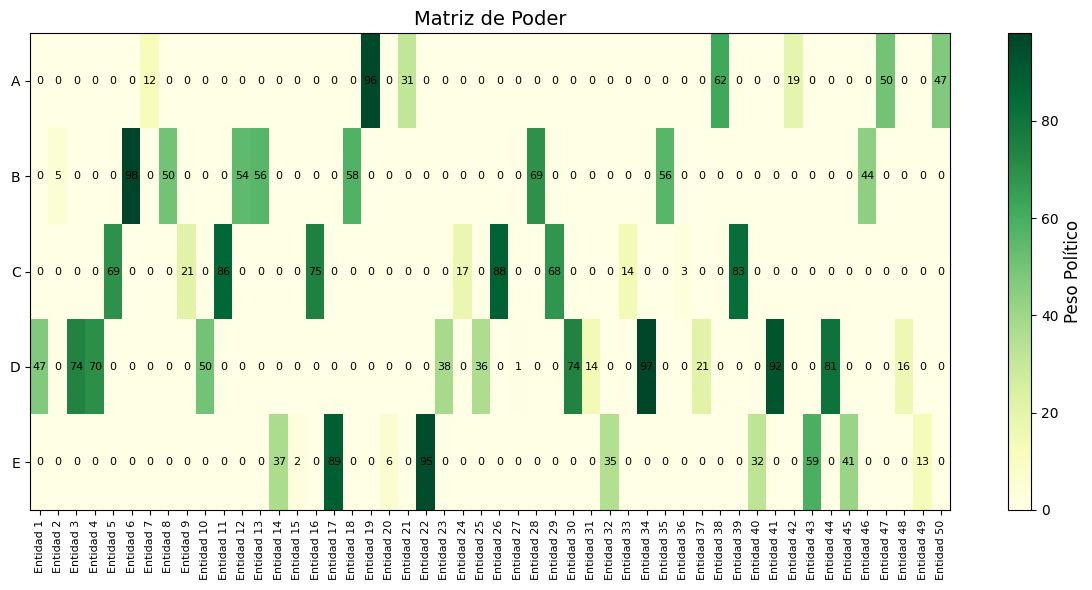

In [2]:
import numpy as np
import matplotlib.pyplot as plt

total_curules = 50
partidos = ['A', 'B', 'C', 'D', 'E']
curules_por_partido = np.random.multinomial(total_curules, [0.2, 0.2, 0.2, 0.2, 0.2])

print("Distribución de curules por partido:")
for i in range(len(partidos)):
    print(f"Partido {partidos[i]}: {curules_por_partido[i]} curules")

entidades = ['Entidad ' + str(i+1) for i in range(total_curules)]
pesos_politicos = np.random.randint(1, 101, total_curules)

print("\nPesos políticos de las entidades:")
for i in range(total_curules):
    print(f"{entidades[i]}: {pesos_politicos[i]} puntos")

def evaluar_distribucion(distribucion, pesos_politicos, curules_por_partido):
    partido_poder = [0] * len(partidos)
    for i in range(len(distribucion)):
        partido_poder[distribucion[i]] += pesos_politicos[i]
    
    diferencia_total = sum(abs(partido_poder[i] - sum(pesos_politicos) * curules_por_partido[i] / total_curules) for i in range(len(partidos)))
    return 1 / (1 + diferencia_total)

def algoritmo_genetico(pesos_politicos, curules_por_partido, tamano_poblacion=100, num_generaciones=1000, prob_mutacion=0.1):
    poblacion = [np.random.randint(0, len(partidos), total_curules) for _ in range(tamano_poblacion)]
    
    for generacion in range(num_generaciones):
        aptitudes = [evaluar_distribucion(distribucion, pesos_politicos, curules_por_partido) for distribucion in poblacion]
        
        indices_padres = np.random.choice(tamano_poblacion, size=tamano_poblacion, replace=True, p=np.array(aptitudes) / sum(aptitudes))
        poblacion_nueva = [poblacion[indice] for indice in indices_padres]
        
        for i in range(tamano_poblacion):
            if np.random.rand() < prob_mutacion:
                indice_cambio = np.random.randint(0, total_curules)
                poblacion_nueva[i][indice_cambio] = np.random.randint(0, len(partidos))
        
        poblacion = poblacion_nueva
    
    aptitudes_finales = [evaluar_distribucion(distribucion, pesos_politicos, curules_por_partido) for distribucion in poblacion]
    mejor_distribucion = poblacion[np.argmax(aptitudes_finales)]
    
    return mejor_distribucion

mejor_distribucion = algoritmo_genetico(pesos_politicos, curules_por_partido)

print("\nDistribución de poder óptima:")
matriz_poder = np.zeros((len(partidos), total_curules), dtype=int)
for i in range(len(partidos)):
    entidades_partido = [entidades[j] for j in range(total_curules) if mejor_distribucion[j] == i]
    poder_partido = sum(pesos_politicos[j] for j in range(total_curules) if mejor_distribucion[j] == i)
    print(f"Partido {partidos[i]}: {entidades_partido} (Poder total: {poder_partido} puntos)")
    
    for j in range(total_curules):
        if mejor_distribucion[j] == i:
            matriz_poder[i, j] = pesos_politicos[j]

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(matriz_poder, cmap='YlGn', aspect='auto')

ax.set_xticks(np.arange(total_curules))
ax.set_yticks(np.arange(len(partidos)))
ax.set_xticklabels(entidades, rotation=90, fontsize=8)
ax.set_yticklabels(partidos, fontsize=10)

for i in range(len(partidos)):
    for j in range(total_curules):
        text = ax.text(j, i, matriz_poder[i, j], ha='center', va='center', color='black', fontsize=8)

ax.set_title('Matriz de Poder', fontsize=14)
fig.tight_layout()

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Peso Político', fontsize=12)

plt.show()





### 8 Ejercicios y Problemas. 

1. Una empresa proveedora de energía eléctrica dispone de cuatro plantas de generación para
satisfacer la demanda diaria de energía eléctrica en Cali, Bogotá, Medellín y Barranquilla. Cada una
puede generar 3, 6, 5 y 4 GW al día respectivamente. Las necesidades de Cali, Bogotá, Medellín y
Barranquilla son de 4, 3, 5 y 3 GW al día respectivamente. Los costos por el transporte de energía
por cada GW entre plantas y ciudades se dan en la siguiente tabla: 

![alt text](image.png)

Los costos del KW-H por generador se dan en la siguiente tabla:


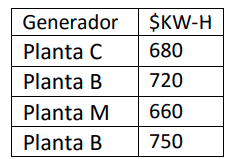

In [4]:
import numpy as np
import random


CAPACIDAD_GENERACION = np.array([3, 6, 5, 4])  
DEMANDA = np.array([4, 3, 5, 3])  
COSTO_TRANSPORTE = np.array([[1, 4, 3, 6],
                             [4, 1, 4, 5],
                             [3, 4, 1, 4],
                             [6, 5, 4, 1]])  
COSTO_GENERACION = np.array([680, 720, 660, 750])  


COSTO_GENERACION_POR_GW = COSTO_GENERACION * 1000 


TAMANO_POBLACION = 100
TASA_MUTACION = 0.01
TASA_CRUCE = 0.8
GENERACIONES = 100


def calcular_costo_total(despacho):
    costo_transporte = np.sum(despacho * COSTO_TRANSPORTE)
    costo_generacion = np.sum(np.sum(despacho, axis=1) * COSTO_GENERACION_POR_GW)
    return costo_transporte + costo_generacion


def crear_individuo():
    individuo = np.zeros((4, 4))
    demanda_local = DEMANDA.copy()
    for planta in range(4):
        capacidad_restante = CAPACIDAD_GENERACION[planta]
        for ciudad in range(4):
            if capacidad_restante > 0 and demanda_local[ciudad] > 0:
                cantidad_despacho = min(capacidad_restante, demanda_local[ciudad])
                individuo[planta][ciudad] = cantidad_despacho
                capacidad_restante -= cantidad_despacho
                demanda_local[ciudad] -= cantidad_despacho
    return individuo

def calcular_aptitud(individuo):
    costo_total = calcular_costo_total(individuo)
    if costo_total == 0:
        return 0
    else:
        return 1 / costo_total

def algoritmo_genetico():
    poblacion = [crear_individuo() for _ in range(TAMANO_POBLACION)]
    mejor_individuo = None
    mejor_costo = float('inf')

    for generacion in range(GENERACIONES):
        aptitud = np.array([calcular_aptitud(ind) for ind in poblacion])

        if np.all(aptitud == 0):
            continue

        indices_seleccionados = np.random.choice(
            TAMANO_POBLACION, size=TAMANO_POBLACION, replace=True, p=aptitud / aptitud.sum())
        poblacion_seleccionada = [poblacion[i] for i in indices_seleccionados]

        nueva_poblacion = []
        for i in range(0, TAMANO_POBLACION, 2):
            padre1, padre2 = poblacion_seleccionada[i], poblacion_seleccionada[i + 1]
            hijo1, hijo2 = padre1.copy(), padre2.copy()

            if random.random() < TASA_CRUCE:
                punto_cruce = random.randint(0, 3)
                hijo1[:, punto_cruce:], hijo2[:, punto_cruce:] = padre2[:, punto_cruce:], padre1[:, punto_cruce:]

            for hijo in (hijo1, hijo2):
                if random.random() < TASA_MUTACION:
                    planta_mutar = random.randint(0, 3)
                    ciudad_mutar = random.randint(0, 3)
                    valor_mutacion = random.choice([-0.1, 0.1]) * CAPACIDAD_GENERACION[planta_mutar]
                    if 0 <= hijo[planta_mutar, ciudad_mutar] + valor_mutacion <= CAPACIDAD_GENERACION[planta_mutar]:
                        hijo[planta_mutar, ciudad_mutar] += valor_mutacion

            nueva_poblacion.extend([hijo1, hijo2])

        poblacion = nueva_poblacion

        for individuo in poblacion:
            costo = calcular_costo_total(individuo)
            if costo < mejor_costo:
                mejor_individuo = individuo
                mejor_costo = costo

        print(f"Generación {generacion}: Mejor Costo = {mejor_costo}")

    return mejor_individuo

mejor_despacho = algoritmo_genetico()
mejor_despacho


Generación 0: Mejor Costo = 10410030.0
Generación 1: Mejor Costo = 10410030.0
Generación 2: Mejor Costo = 10410030.0
Generación 3: Mejor Costo = 10410030.0
Generación 4: Mejor Costo = 10410030.0
Generación 5: Mejor Costo = 10410030.0
Generación 6: Mejor Costo = 10410030.0
Generación 7: Mejor Costo = 10080028.0
Generación 8: Mejor Costo = 10080028.0
Generación 9: Mejor Costo = 9978029.4
Generación 10: Mejor Costo = 9978029.4
Generación 11: Mejor Costo = 9978029.4
Generación 12: Mejor Costo = 9978029.4
Generación 13: Mejor Costo = 9978029.4
Generación 14: Mejor Costo = 9978029.4
Generación 15: Mejor Costo = 9978029.4
Generación 16: Mejor Costo = 9978029.4
Generación 17: Mejor Costo = 9978029.4
Generación 18: Mejor Costo = 9978029.4
Generación 19: Mejor Costo = 9978029.4
Generación 20: Mejor Costo = 9978029.4
Generación 21: Mejor Costo = 9978029.4
Generación 22: Mejor Costo = 9978029.4
Generación 23: Mejor Costo = 9978029.4
Generación 24: Mejor Costo = 9978029.4
Generación 25: Mejor Costo

array([[3. , 0. , 0. , 0. ],
       [1. , 3. , 1.4, 0. ],
       [0. , 0. , 3. , 2. ],
       [0. , 0. , 0. , 1. ]])

### 2 y 3

2. En el siguiente enlace se encuentra un programa Python para la solución del TSP (Traveling
Salesman Problem):
https://github.com/rocreguant/personal_blog/blob/main/Genetic_Algorithm_Python_Example/Tr
aveling_Salesman_Problem.ipynb
3. Estúdielo y úselo como laboratorio, usando diferentes tipos de selección y diferente número de
generaciones. Imprima las gráficas correspondientes.

0 719.796025862668 951.2823607819076 18/03/24 18:39
100 799.8632891710874 955.5619700278563 18/03/24 18:39
200 643.3405656444312 946.5417252541769 18/03/24 18:39
300 724.6123922484395 953.4531471151257 18/03/24 18:39
400 752.8665198269714 945.4384553209079 18/03/24 18:39
500 743.9288061618241 958.2084317658368 18/03/24 18:39
600 760.6175181213348 946.5952244434283 18/03/24 18:39
700 745.9255213615255 963.6627748334685 18/03/24 18:39
800 801.4272275500454 958.3517122974264 18/03/24 18:39
900 729.2110444951292 940.7100317017923 18/03/24 18:39
1000 746.6639021502622 966.1677822209643 18/03/24 18:39
1100 776.7204491801231 952.3412204706417 18/03/24 18:39
1200 750.9214817923043 940.9869326574251 18/03/24 18:39
1300 743.0719476107768 949.8002226037082 18/03/24 18:39
1400 778.7731922916474 964.1203473272908 18/03/24 18:39
1500 775.0025213338824 954.0446133653978 18/03/24 18:39
1600 779.1962154348377 942.3417761525094 18/03/24 18:39
1700 737.9044723392495 953.169538505046 18/03/24 18:39
1800 7

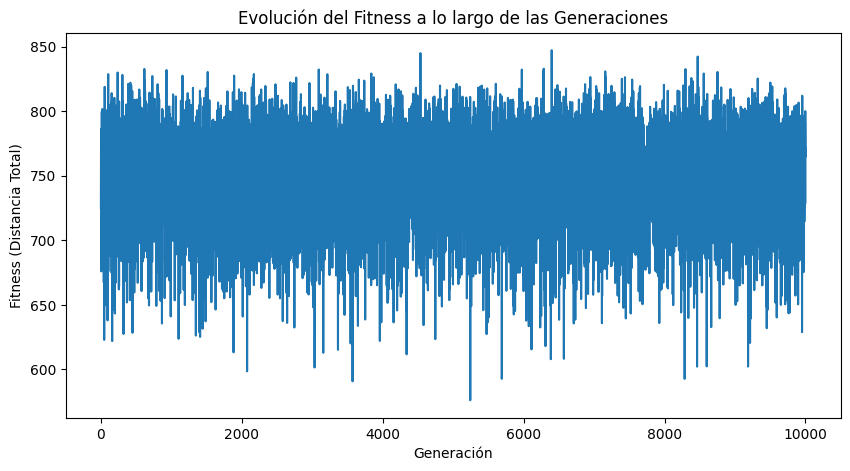

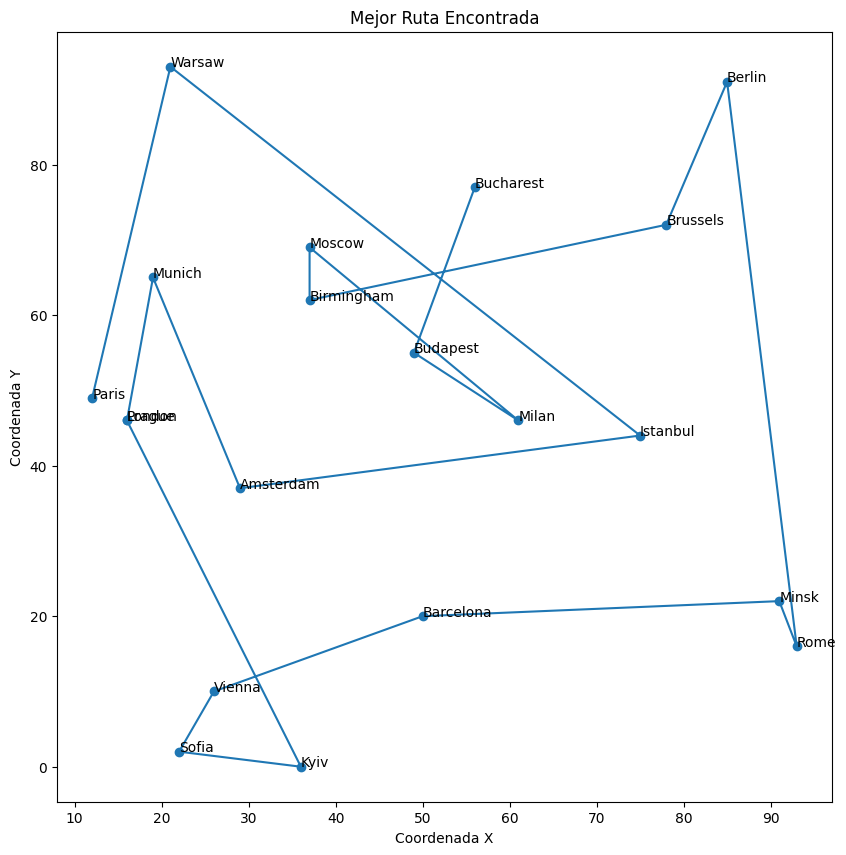

[5242, 576.1494716229828, array([['Bucharest', 'Budapest', 'Milan', 'Moscow', 'Birmingham',
        'Brussels', 'Berlin', 'Rome', 'Minsk', 'Barcelona', 'Vienna',
        'Sofia', 'Kyiv', 'Prague', 'London', 'Munich', 'Amsterdam',
        'Istanbul', 'Warsaw', 'Paris']], dtype='<U10')]


In [12]:
# Imports 
import numpy as np
import random
import matplotlib.pyplot as plt


from datetime import datetime

# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.1

# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])


# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)


def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)


def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])



progenitor_list = progenitor_selection(population_set,fitnes_list)


def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)


def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)

best_fitness_history = []
best_solution = [-1,np.inf,np.array([])]
for i in range(10000):
    if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    best_fitness_history.append(fitnes_list.min())
    
    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

plt.figure(figsize=(10, 5))
plt.plot(best_fitness_history)
plt.xlabel('Generación')
plt.ylabel('Fitness (Distancia Total)')
plt.title('Evolución del Fitness a lo largo de las Generaciones')
plt.show()

# Graficar la mejor ruta encontrada
best_route = best_solution[2][0]
x = [cities_dict[city][0] for city in best_route]
y = [cities_dict[city][1] for city in best_route]

plt.figure(figsize=(10, 10))
plt.plot(x, y, 'o-')
for city, x, y in zip(best_route, x, y):
    plt.text(x, y, city)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Mejor Ruta Encontrada')
plt.show()

print(best_solution)

### 4

Genere aleatoriamente una población de 50 palabras, que se escuche por el parlante del
computador. Tomando como función de aptitud una palabra suya, usando AGs, con base en las
palabras generadas aleatoriamente llegue a la palabra que usó como función de aptitud.


In [13]:
import numpy as np
import random

objetivo = 'python'
longitud_objetivo = len(objetivo)
tamaño_poblacion = 50
tasa_mutacion = 0.1
max_generaciones = 1000
alfabeto = 'abcdefghijklmnopqrstuvwxyz'

def generar_palabra(longitud):
    return ''.join(random.choice(alfabeto) for _ in range(longitud))

def generar_poblacion(tamaño, longitud_objetivo):
    return [generar_palabra(longitud_objetivo) for _ in range(tamaño)]

def aptitud(individuo, objetivo):
    return sum(c1 == c2 for c1, c2 in zip(individuo, objetivo))

def seleccion(poblacion, objetivo):
    competidores = random.sample(poblacion, 2)
    aptitud_1 = aptitud(competidores[0], objetivo)
    aptitud_2 = aptitud(competidores[1], objetivo)
    return competidores[0] if aptitud_1 > aptitud_2 else competidores[1]

def cruce(padre1, padre2):
    punto_cruce = random.randint(1, longitud_objetivo-1)
    hijo = padre1[:punto_cruce] + padre2[punto_cruce:]
    return hijo

def mutacion(individuo, tasa_mutacion):
    individuo_mutado = ''
    for char in individuo:
        if random.random() < tasa_mutacion:
            individuo_mutado += random.choice(alfabeto)
        else:
            individuo_mutado += char
    return individuo_mutado

poblacion = generar_poblacion(tamaño_poblacion, longitud_objetivo)
generacion = 0
mejor_aptitud = 0

while mejor_aptitud < longitud_objetivo and generacion < max_generaciones:
    nueva_poblacion = []
    for _ in range(tamaño_poblacion):
        padre1 = seleccion(poblacion, objetivo)
        padre2 = seleccion(poblacion, objetivo)
        hijo = cruce(padre1, padre2)
        hijo = mutacion(hijo, tasa_mutacion)
        nueva_poblacion.append(hijo)
    poblacion = nueva_poblacion
    mejor_aptitud = max(aptitud(individuo, objetivo) for individuo in poblacion)
    print(f"Generación {generacion+1}: Mejor individuo: {max(poblacion, key=lambda individuo: aptitud(individuo, objetivo))}, Aptitud: {mejor_aptitud}")
    generacion += 1

mejor_individuo = max(poblacion, key=lambda individuo: aptitud(individuo, objetivo))




Generación 1: Mejor individuo: pthhmg, Aptitud: 2
Generación 2: Mejor individuo: ptxrhn, Aptitud: 2
Generación 3: Mejor individuo: yyqkmn, Aptitud: 2
Generación 4: Mejor individuo: yyhhmb, Aptitud: 2
Generación 5: Mejor individuo: sfthtn, Aptitud: 3
Generación 6: Mejor individuo: pyxuon, Aptitud: 4
Generación 7: Mejor individuo: sythyn, Aptitud: 4
Generación 8: Mejor individuo: syhhon, Aptitud: 4
Generación 9: Mejor individuo: pydhvn, Aptitud: 4
Generación 10: Mejor individuo: python, Aptitud: 6


### 5. PYGAD

Suponga que usted es el jefe de gobierno y está interesado en que pasen los proyectos de su
programa político. Sin embargo, en el congreso conformado por 5 partidos, no es fácil su tránsito,
por lo que debe repartir el poder, conformado por ministerios y otras agencias del gobierno, con
base en la representación de cada partido. Cada entidad estatal tiene un peso de poder, que es el
que se debe distribuir. Suponga que hay 50 curules, distribuya aleatoriamente, con una distribución
no informe entre los 5 partidos esas curules. Defina una lista de 50 entidades y asígneles
aleatoriamente un peso político de 1 a 100 puntos. Cree una matriz de poder para repartir ese
poder, usando AGs.

In [16]:
pip install pygad

  Using cached pygad-3.3.1-py3-none-any.whl.metadata (19 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
Using cached pygad-3.3.1-py3-none-any.whl (84 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


c:\Users\dmriv\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Mejor solución: [0 1 2 0 1 1 3 1 1 2 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 2 1 3 1 1 3 0 1 2 1 1 1
 1 2 3 0 0 0 0 2 1 1 1 0 1]
Aptitud de la mejor solución: 0.00046810343213436436
Distribución del poder político:
Partido 1: 556
Partido 2: 1309
Partido 3: 450
Partido 4: 227
Partido 5: 0


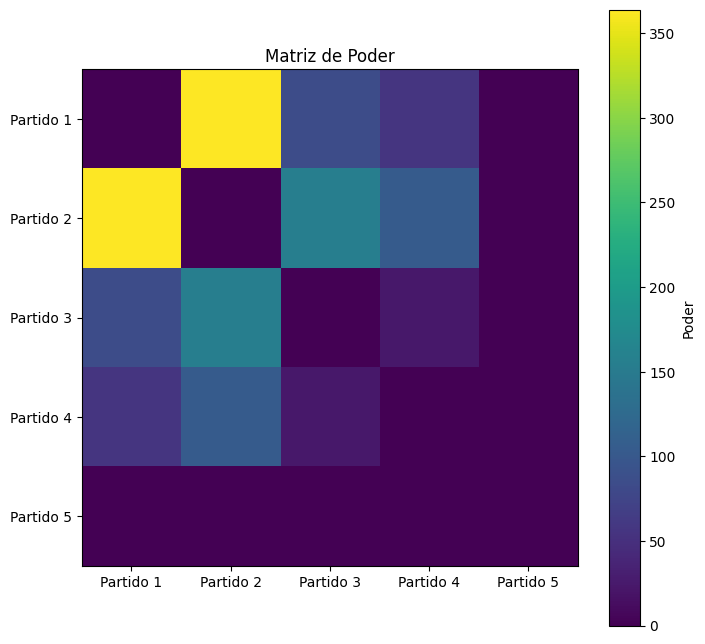

In [21]:
import pygad
import random

num_curules = 50
num_partidos = 5
curules_por_partido = [random.randint(1, num_curules) for _ in range(num_partidos)]
curules_por_partido[-1] = num_curules - sum(curules_por_partido[:-1])

num_entidades = 50
pesos_politicos = [random.randint(1, 100) for _ in range(num_entidades)]

def fitness_func(ga_instance, solution, solution_idx):
    poder_total = sum(pesos_politicos)
    poder_por_partido = [0] * num_partidos
    for i in range(num_entidades):
        partido = solution[i]
        poder_por_partido[partido] += pesos_politicos[i]
    
    diferencias = []
    for i in range(num_partidos):
        poder_esperado = poder_total * (curules_por_partido[i] / num_curules)
        diferencia = abs(poder_por_partido[i] - poder_esperado)
        diferencias.append(diferencia)
    
    aptitud = 1 / (1 + sum(diferencias))
    return aptitud

num_generations = 100
num_parents_mating = 4
population_size = 50
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       num_genes=num_entidades,
                       init_range_low=0,
                       init_range_high=num_partidos-1,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_type=int,
                       sol_per_pop=population_size)  

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución:", solution)
print("Aptitud de la mejor solución:", solution_fitness)

poder_por_partido = [0] * num_partidos
for i in range(num_entidades):
    partido = solution[i]
    poder_por_partido[partido] += pesos_politicos[i]

print("Distribución del poder político:")
for i in range(num_partidos):
    print(f"Partido {i+1}: {poder_por_partido[i]}")

matriz_poder = np.zeros((num_partidos, num_partidos))
for i in range(num_entidades):
    partido_i = solution[i]
    for j in range(i+1, num_entidades):
        partido_j = solution[j]
        if partido_i != partido_j:
            matriz_poder[partido_i][partido_j] += 1
            matriz_poder[partido_j][partido_i] += 1

plt.figure(figsize=(8, 8))
plt.imshow(matriz_poder, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Poder')
plt.xticks(range(num_partidos), ['Partido {}'.format(i+1) for i in range(num_partidos)])
plt.yticks(range(num_partidos), ['Partido {}'.format(i+1) for i in range(num_partidos)])
plt.title('Matriz de Poder')
plt.show()